In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Estimators needed
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Polynomials with scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Pipeline
from sklearn.pipeline import Pipeline

# Feature scaling
from sklearn.preprocessing import StandardScaler

%matplotlib inline

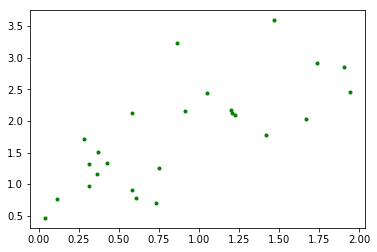

In [34]:
# Generate some random points
np.random.seed(42)
m = 25
X = 2 * np.random.rand(m, 1)
y = 1 + 0.8 * X + np.random.randn(m, 1) / 1.8
Xn = np.linspace(0, 2, 100).reshape(100, 1)
plt.plot(X,y,"g.")

In [44]:
def plot_model(model_class, higher_degree_polynomial, lmbds, **kwargs):
    for lmbd, style in zip(lmbds, ("c-", "y--", "m:")): # Lambda takes different values for comparison
        model = model_class(lmbd, **kwargs) if lmbd > 0 else LinearRegression() # Use shrinkage models when lambda > 0
        if higher_degree_polynomial: 
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(Xn)
        lw = 2 if lmbd > 0 else 1
        plt.plot(Xn, y_new_regul, style, linewidth=lw, label=r"$\lambda = {}$".format(lmbd))
    plt.plot(X, y, "g.", linewidth=4)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 4])

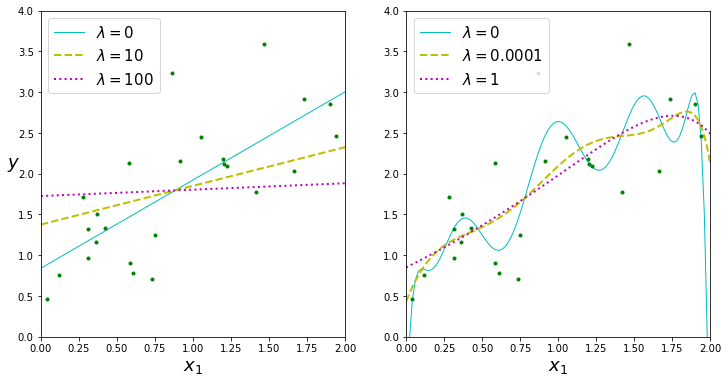

In [45]:
# Using Ridge Regression regularization
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_model(Ridge, higher_degree_polynomial=False, lmbds=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, higher_degree_polynomial=True, lmbds=(0, 10**-4, 1), random_state=42)

plt.show()

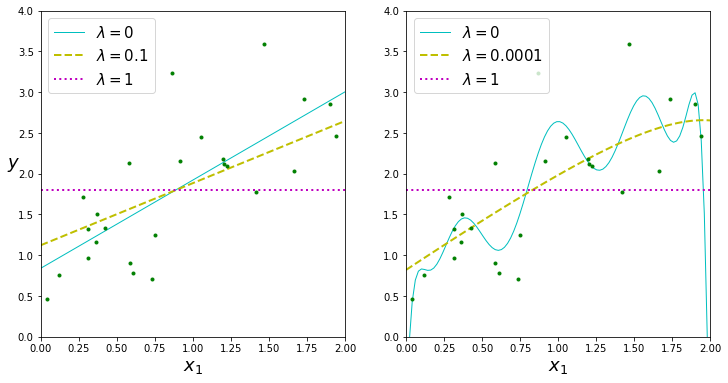

In [46]:
# Using Lasso regularization
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_model(Lasso, higher_degree_polynomial=False, lmbds=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, higher_degree_polynomial=True, lmbds=(0, 10**-4, 1), tol=1, random_state=42)

plt.show()